Github link: https://github.com/isabelleantaran/GSB-544-Projects/tree/main

# Working with Data of Global Indicators – Gapminder

# Task 1

1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.

The plot below shows the relationship between life expectancy measured by income.

x = income (GDP per capita)\
y = life expectancy (in years)

In addition to the titles in x-axis and y-axis, there are also sub x-axis and sub y-axis title, which are its measurements of "GDP per capita" and "years" respectively.

The variables are mapped for the color to represent a region; there are a total of four regions represented in this plot.\
Each bubble represents a specific country.\
The size of the bubbles represent the population.

The year 2010 for the dataset is noted in the background, in a lighter shade of grey.

2. Import the q1data.csv dataset.

In [682]:
import pandas as pd

q1Data = pd.read_csv("Data/q1data.csv") 
q1Data

,income,life_exp,population,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,1910.0,61.0,29200000.0,2010,Afghanistan,asia,south_asia,asia_west,South Asia
1,11100.0,78.1,2950000.0,2010,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,11100.0,74.7,36000000.0,2010,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,46900.0,81.9,84500.0,2010,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
4,7680.0,60.8,23400000.0,2010,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...
192,20400.0,75.4,28400000.0,2010,Venezuela,americas,america,america_south,Latin America & Caribbean
193,5350.0,73.3,88000000.0,2010,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
194,4700.0,67.8,23200000.0,2010,Yemen,asia,middle_east_north_africa,asia_west,Middle East & North Africa
195,3200.0,57.5,13600000.0,2010,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


3. Recreate the plot as best as you can using `plotnine`.

In [765]:
q1Data_clean = q1Data.dropna(subset=["four_regions"])

C:\Users\antar\anaconda3\Lib\site-packages\plotnine\layer.py:372: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


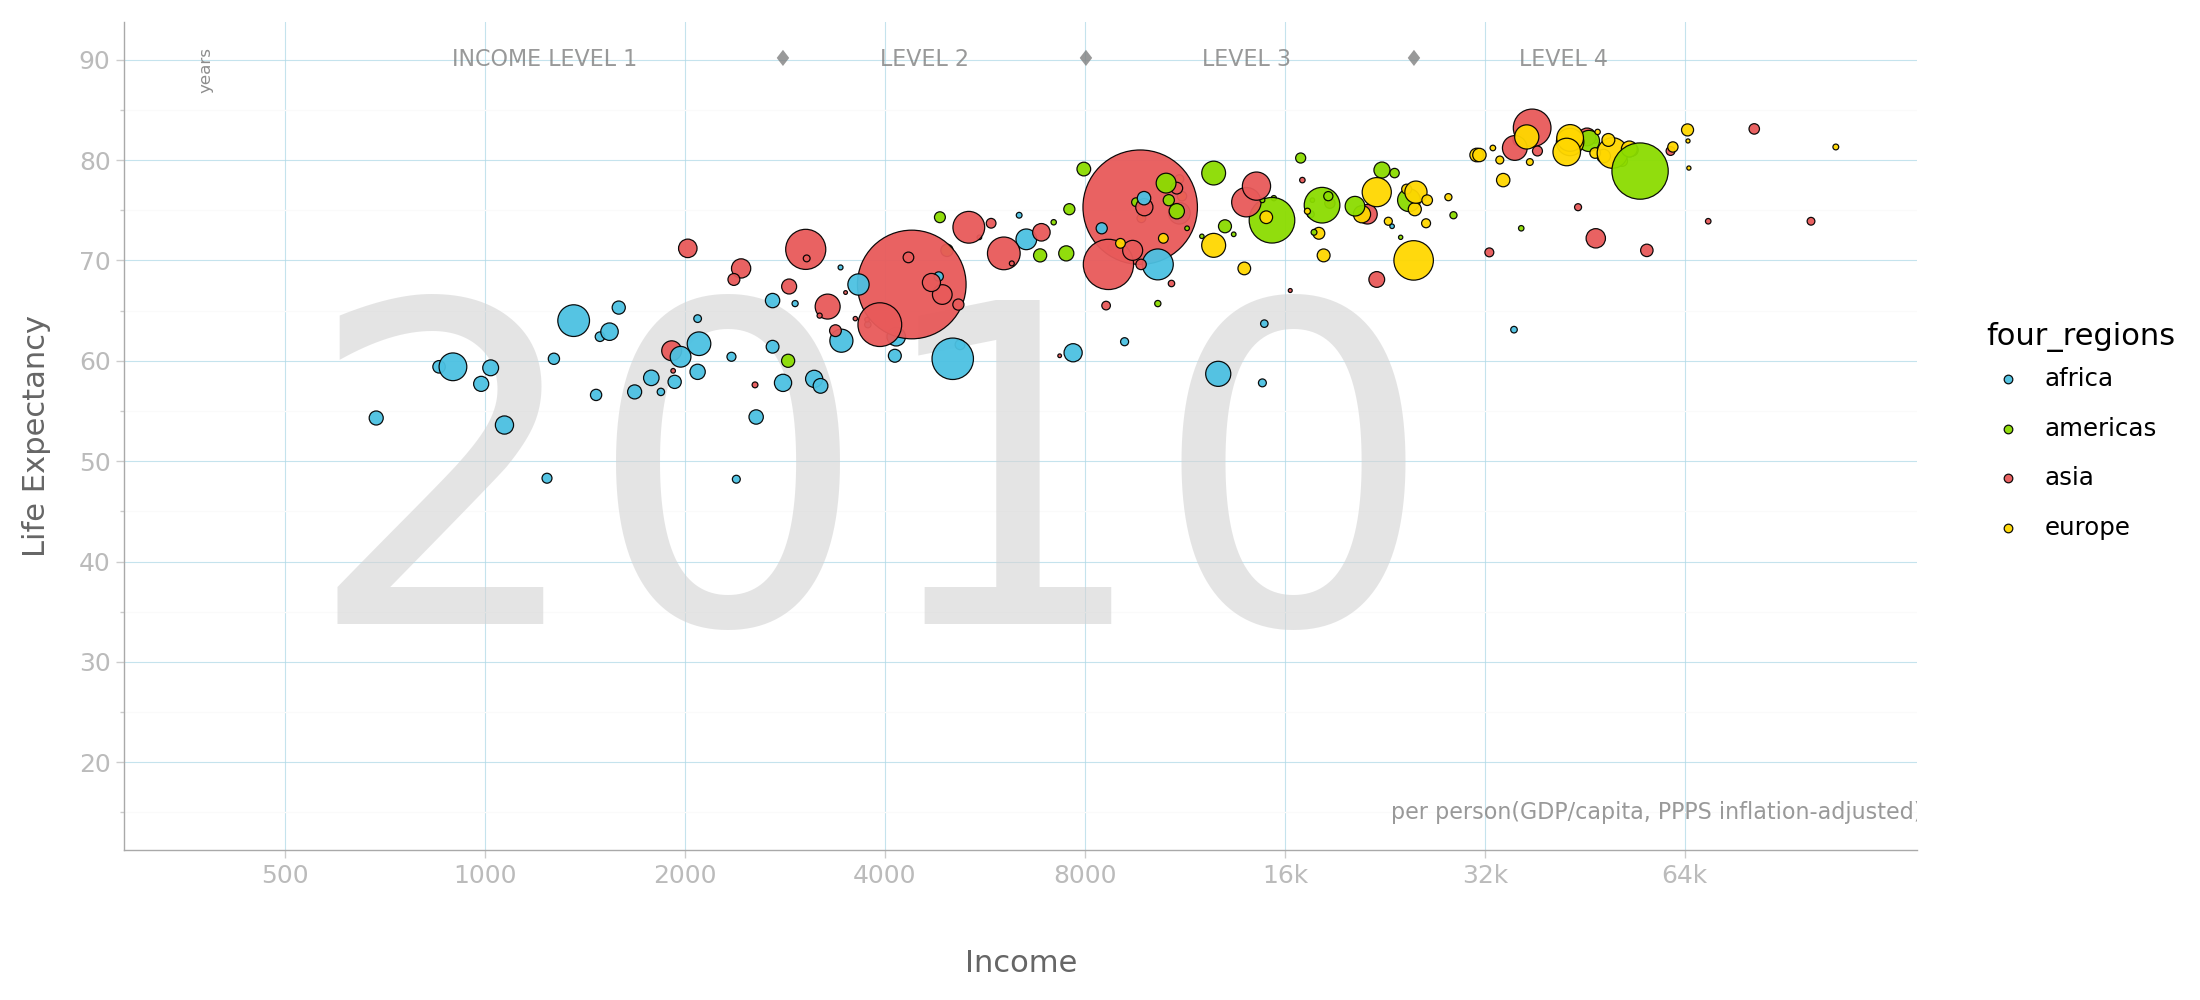

In [769]:
import plotnine as p9

plotBubble = (
    p9.ggplot(q1Data_clean, p9.aes(x= "income", y= "life_exp", size= "population"))

     # Annotate year 2010 before geom_point so that the layer is behind the bubble points. 
    + p9.annotate("text", x=3800, y=46, label= "2010", size= 160, color= "lightgrey", alpha= 0.6)

    + p9.geom_point(p9.aes(fill= "four_regions"),
        color= "black", 
        stroke= 0.25,
        alpha= 0.95)

    + p9.scale_x_continuous(
        trans= 'log2',
        breaks= [500, 1000, 2000, 4000, 8000, 16000, 32000, 64000],
        labels= ["500", "1000","2000", "4000", "8000", "16k", "32k", "64k"])

    + p9.scale_y_continuous(
        limits= (15,90), #started with 15 instead of 20 to illustrate some space or distance before 20, as seen on the reference
        breaks= range(20,91,10))

    + p9.labs(
        x= "Income", y= "Life Expectancy")

    + p9.theme_minimal() 

    + p9.theme(
        # White background
        plot_background= p9.element_rect(fill= "white", color= "white"),
        panel_background= p9.element_rect(fill= "white", color= "white"),

        # Grid style
        figure_size= (11,5),
        panel_grid_major= p9.element_line(color= "#ADD8E6", size= 0.4, alpha= 0.7),
        panel_grid_minor= None,

        # No border at the top and the right
        panel_border= p9.element_blank(),

        #Axis styling
        axis_text= p9.element_text(color= "#BBBBBB", size= 9),
        axis_title= p9.element_text(color= "#666666", size= 11),
        axis_line= p9.element_line(color= "darkgrey", size= 0.5),
        axis_ticks= p9.element_line(color= "#CCCCCC", size= 0.5),

        axis_title_x= p9.element_text(margin= {"t": 10}),
        axis_title_y= p9.element_text(margin= {"r": 10}, angle= 90)
    )

    + p9.scale_fill_manual(values= ["#4CC1E2", "#8BDC00", "#E85A5A", "#FFD700"])
    + p9.scale_size(range=(0.5, 23))
    + p9.guides(size= False)

    #annotate top labels for years and income levels
    + p9.annotate("text", x= 380, y= 89, label= "years", size= 6, color= "grey", alpha= 0.9, angle= 90)
    + p9.annotate("text", x= 1230, y= 90, label= "INCOME LEVEL 1", size= 8, color= "grey", alpha= 0.80)
    + p9.annotate("text", x= 4590, y=90, label= "LEVEL 2", size= 8, color= "grey", alpha= 0.80)
    + p9.annotate("text", x= 14000, y=90, label= "LEVEL 3", size= 8, color= "grey", alpha= 0.80)
    + p9.annotate("text", x= 42000, y= 90, label= "LEVEL 4", size= 8, color= "grey", alpha= 0.80)

    #annotate diamonds between income labels 
    + p9.annotate("text", x=2800, y=90, label= "\u2666", size= 8, color= "grey", alpha= 0.80)
    + p9.annotate("text", x=8000, y=90, label= "\u2666", size= 8, color= "grey", alpha= 0.80)
    + p9.annotate("text", x=25000, y=90, label= "\u2666", size= 8, color= "grey", alpha= 0.80)

    #annotate label at the bottom for per person(GDP/capita)
    + p9.annotate("text", x=58000, y=15, label= "per person(GDP/capita, PPPS inflation-adjusted)", size= 8, color= "grey", alpha= 0.80)
)

plotBubble.show()

4. What other geometries could you use here besides `geom_point`? Provide an actual plot of another geometry being used here and why it's good or bad for visualizing these data.

To illustrate the plot, another geometry we can use is `geom_density_2d`. 

C:\Users\antar\anaconda3\Lib\site-packages\plotnine\guides\guides.py:211: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
C:\Users\antar\anaconda3\Lib\site-packages\plotnine\guides\guides.py:211: PlotnineWarning: Cannot generate legend for the 'size' aesthetic. Make sure you have mapped a variable to it


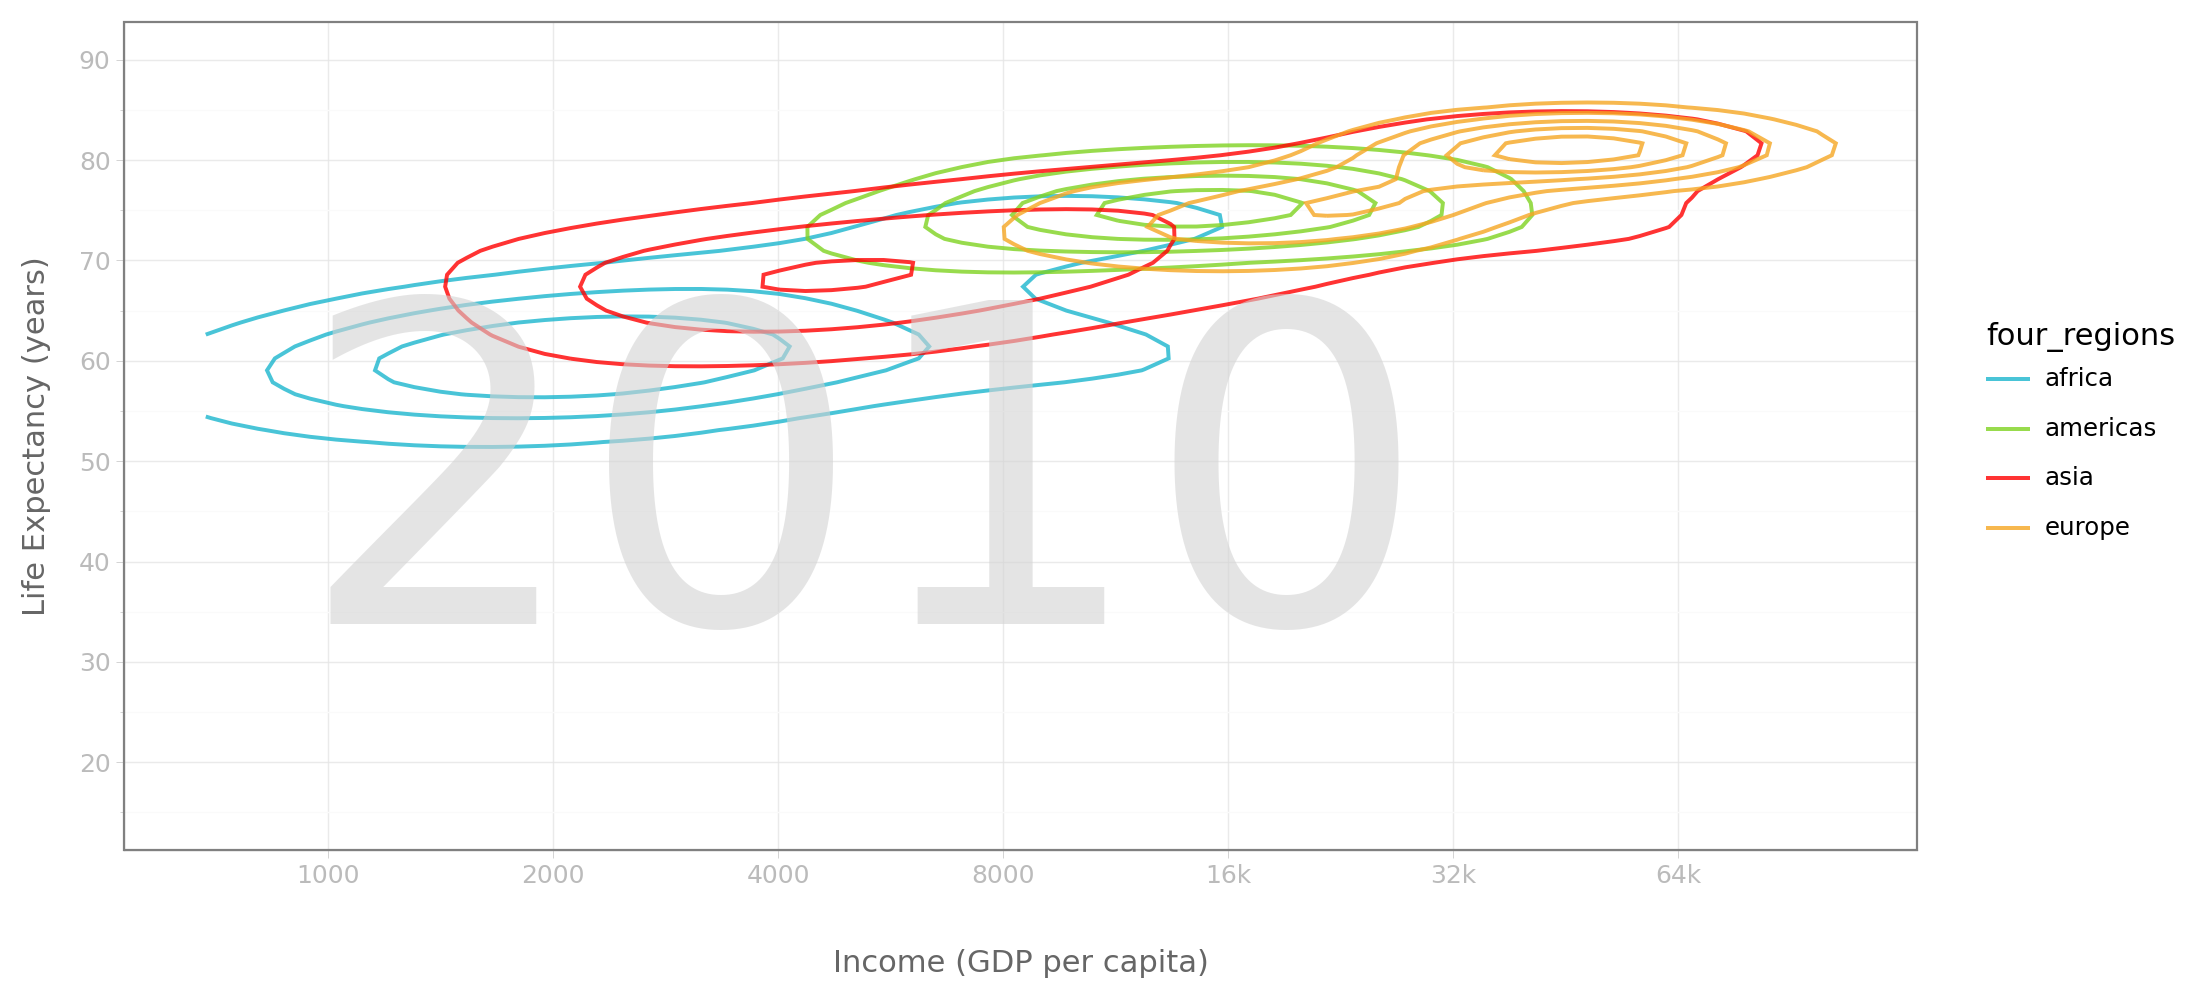

In [774]:
q1Data_clean = q1Data.dropna(subset=['income', 'life_exp', 'four_regions'])

plotDensity = (
    p9.ggplot(q1Data_clean, p9.aes(x= "income", y= "life_exp"))
    
    + p9.geom_density_2d(p9.aes(color= "four_regions"), alpha= 0.8, size= 0.8)
    
    # Annotate year 2010
    + p9.annotate("text", x=5200, y=46, label= "2010", size= 160, color= "lightgrey", alpha= 0.6)
    
    + p9.scale_x_continuous(
        trans= 'log2',
        breaks= [500, 1000, 2000, 4000, 8000, 16000, 32000, 64000],
        labels= ["500", "1000","2000", "4000", "8000", "16k", "32k", "64k"])

    + p9.scale_y_continuous(
        limits= (15,90),
        breaks= range(20,91,10))
    
    + p9.labs(
        x= "Income (GDP per capita)", y= "Life Expectancy (years)")
    
    + p9.theme_minimal()

    + p9.theme(
        # White background
        plot_background= p9.element_rect(fill= "white", color= "white"),
        panel_background= p9.element_rect(fill= "white", color= "white"),
        
        # Add panel border (grey outline)
        panel_border= p9.element_rect(color= "grey", fill= None, size= 0.8),
        
        # Axis styling
        axis_text= p9.element_text(color= "#BBBBBB", size= 9),
        axis_title= p9.element_text(color= "#666666", size= 11),
        axis_line= p9.element_line(color= "#CCCCCC", size= 0.5),
        axis_ticks= p9.element_line(color= "#CCCCCC", size= 0.3),
        
        axis_title_x= p9.element_text(margin= {"t": 10}),
        axis_title_y= p9.element_text(margin= {"r": 10}, angle= 90),

        figure_size= (11,5),
        panel_grid_major= p9.element_line(color= "#E5E5E5", size= 0.5, alpha= 0.8),
        panel_grid_minor= None,
    )
    
    + p9.scale_fill_manual(values= ["#1BB6CE", "#7FD321", "#FF0000", "#F5A623"])
    + p9.scale_color_manual(values= ["#1BB6CE", "#7FD321", "#FF0000", "#F5A623"])
    + p9.scale_size(range=(0.5, 23))
)

plotDensity.show()


As seen above, we could use `geom_density_2d` where countries cluster in income and life expectancy. The advantage of this visualization is its clear identification of different regions, as it is still color-coded.\
It also highlights patterns of the four regions. However, the disadvantage is that the information regarding individual countries (as previously seen on each bubble) are no longer present.

# Task 2

1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.

The plot below shows the relationship between exports and imports of countries.

x = exports (% of each country's GDP)\
y = imports (% of each country's GDP)

The variables are mapped in such a way that the colors of the bubble represent each region,\
each bubble represents a single country, and the size of each bubble represents the energy use.

The year 1997 is noted in the background, in a lighter shade of grey.

2. Import the q2data.csv dataset.

In [524]:
import pandas as pd

q2Data = pd.read_csv("Data/q2data.csv")
q2Data


,imports,exports,energy,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,NaN,NaN,NaN,1997,Afghanistan,asia,south_asia,asia_west,South Asia
1,36.7,11.5,427,1997,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,22.5,22.6,825,1997,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,NaN,NaN,1997,American Samoa,NaN,NaN,NaN,NaN
4,NaN,NaN,434,1997,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...
201,52.2,44.8,340,1997,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
202,NaN,NaN,NaN,1997,Virgin Islands (U.S.),NaN,NaN,NaN,NaN
203,NaN,NaN,241,1997,Yemen,NaN,NaN,NaN,NaN
204,31.6,24.6,617,1997,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


3. Recreate the plot as best as you can using `plotnine`.

In [772]:
q2Data["exports"] = pd.to_numeric(q2Data["exports"], errors= "coerce")
q2Data["imports"] = pd.to_numeric(q2Data["imports"], errors= "coerce")
q2Data["energy"] = pd.to_numeric(q2Data["energy"], errors= "coerce")

q2Data_clean = q2Data.dropna(subset=["four_regions"])

C:\Users\antar\anaconda3\Lib\site-packages\plotnine\layer.py:372: PlotnineWarning: geom_point : Removed 57 rows containing missing values.


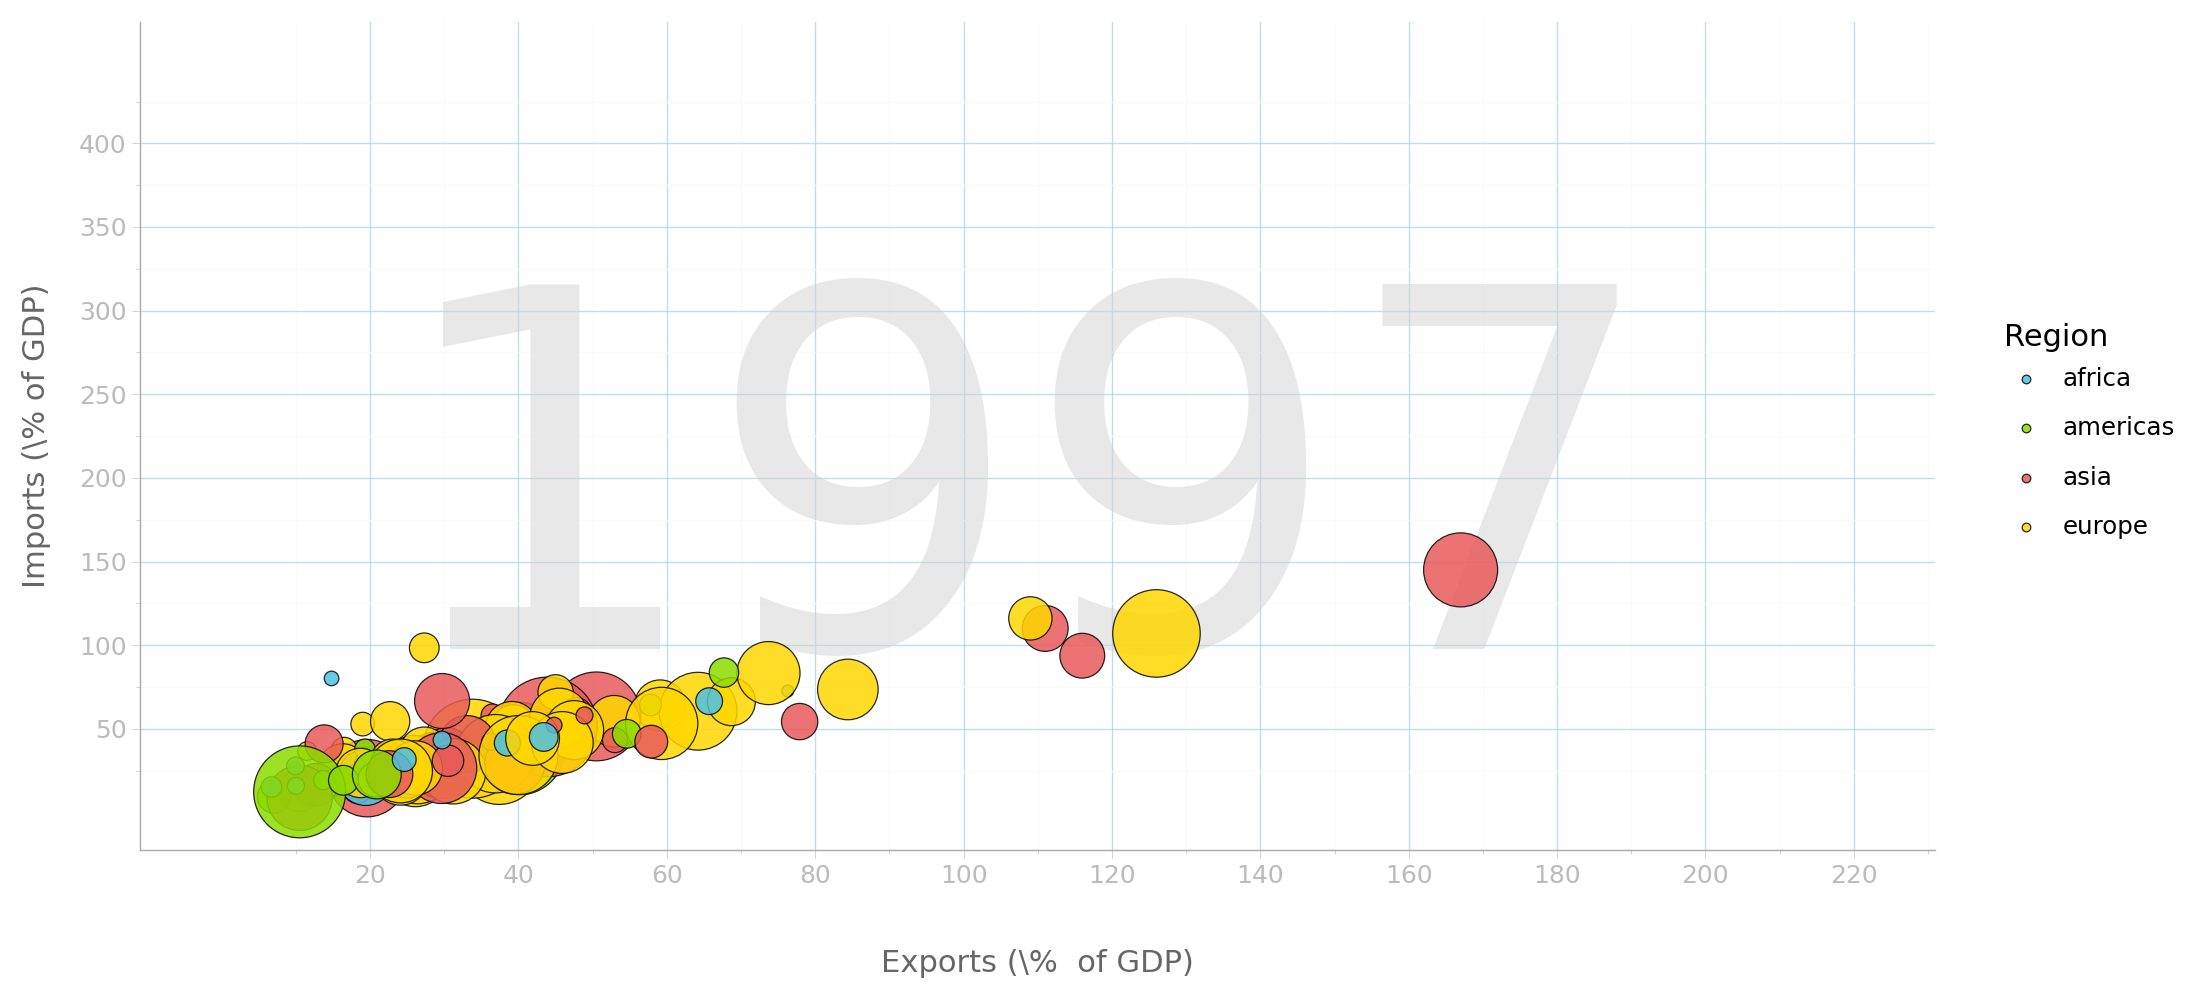

In [773]:
import plotnine as p9
plotBubble2= (
    p9.ggplot(q2Data_clean, p9.aes(x= "exports", y= "imports", size= "energy"))

    # annotate year 1997

    +p9.annotate("text", x=108, y=180, label= "1997", size= 180, color= "lightgrey", alpha= 0.5)

    + p9.geom_point(
        p9.aes(fill= "four_regions"), color= "black", stroke= 0.25, alpha = 0.85)

    + p9.scale_x_continuous(
        limits= (0, 220),
        breaks= [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220], #start at 20 since 0 is not visible in reference graph
    )

    + p9.scale_y_continuous(
        limits= (0, 450),
        breaks= [50, 100, 150, 200, 250, 300, 350, 400], #start at 50 since 0 is not visible in reference graph
        expand= (0.05, 0.05) #for bubble points to start higher
    )

    + p9.scale_size_area(max_size= 20)
    + p9.guides(size= False)
    + p9.labs(x= "Exports (\%  of GDP)", y= "Imports (\% of GDP)", fill= "Region")

    + p9.theme_minimal() 

    + p9.theme(
        # White background
        plot_background= p9.element_rect(fill= "white", color= "white"),
        panel_background= p9.element_rect(fill= "white", color= "white"),

        # Grid style
        figure_size= (11,5),
        panel_grid_major= p9.element_line(color= "#ADD8E6", size= 0.5, alpha= 0.8),
        panel_grid_minor= None,

        panel_border= p9.element_blank(),

        #Axis styling
        axis_text= p9.element_text(color= "#BBBBBB", size= 9),
        axis_title= p9.element_text(color= "#666666", size= 11),
        axis_line= p9.element_line(color= "darkgrey", size= 0.5),
        axis_ticks= p9.element_line(color= "#CCCCCC", size= 0.3),

        axis_title_x= p9.element_text(margin= {"t": 10}),
        axis_title_y= p9.element_text(margin= {"r": 10}, angle= 90)

    )

    + p9.scale_fill_manual(values={
        "asia": "#E85A5A",
        "europe": "#FFD700",
        "americas":"#8BDC00",
        "africa": "#4CC1E2"
    })

)

plotBubble2.show()



4. What other geometries could you use here besides `geom_point`? Provide an actual plot of another geometry being used here and why it's good or bad for visualizing these data.

To illustrate the plot, another geometry we can use is `geom_text`.

In [ ]:
q2Data_clean = q2Data.dropna(subset=["four_regions"])

C:\Users\antar\anaconda3\Lib\site-packages\plotnine\layer.py:372: PlotnineWarning: geom_text : Removed 19 rows containing missing values.


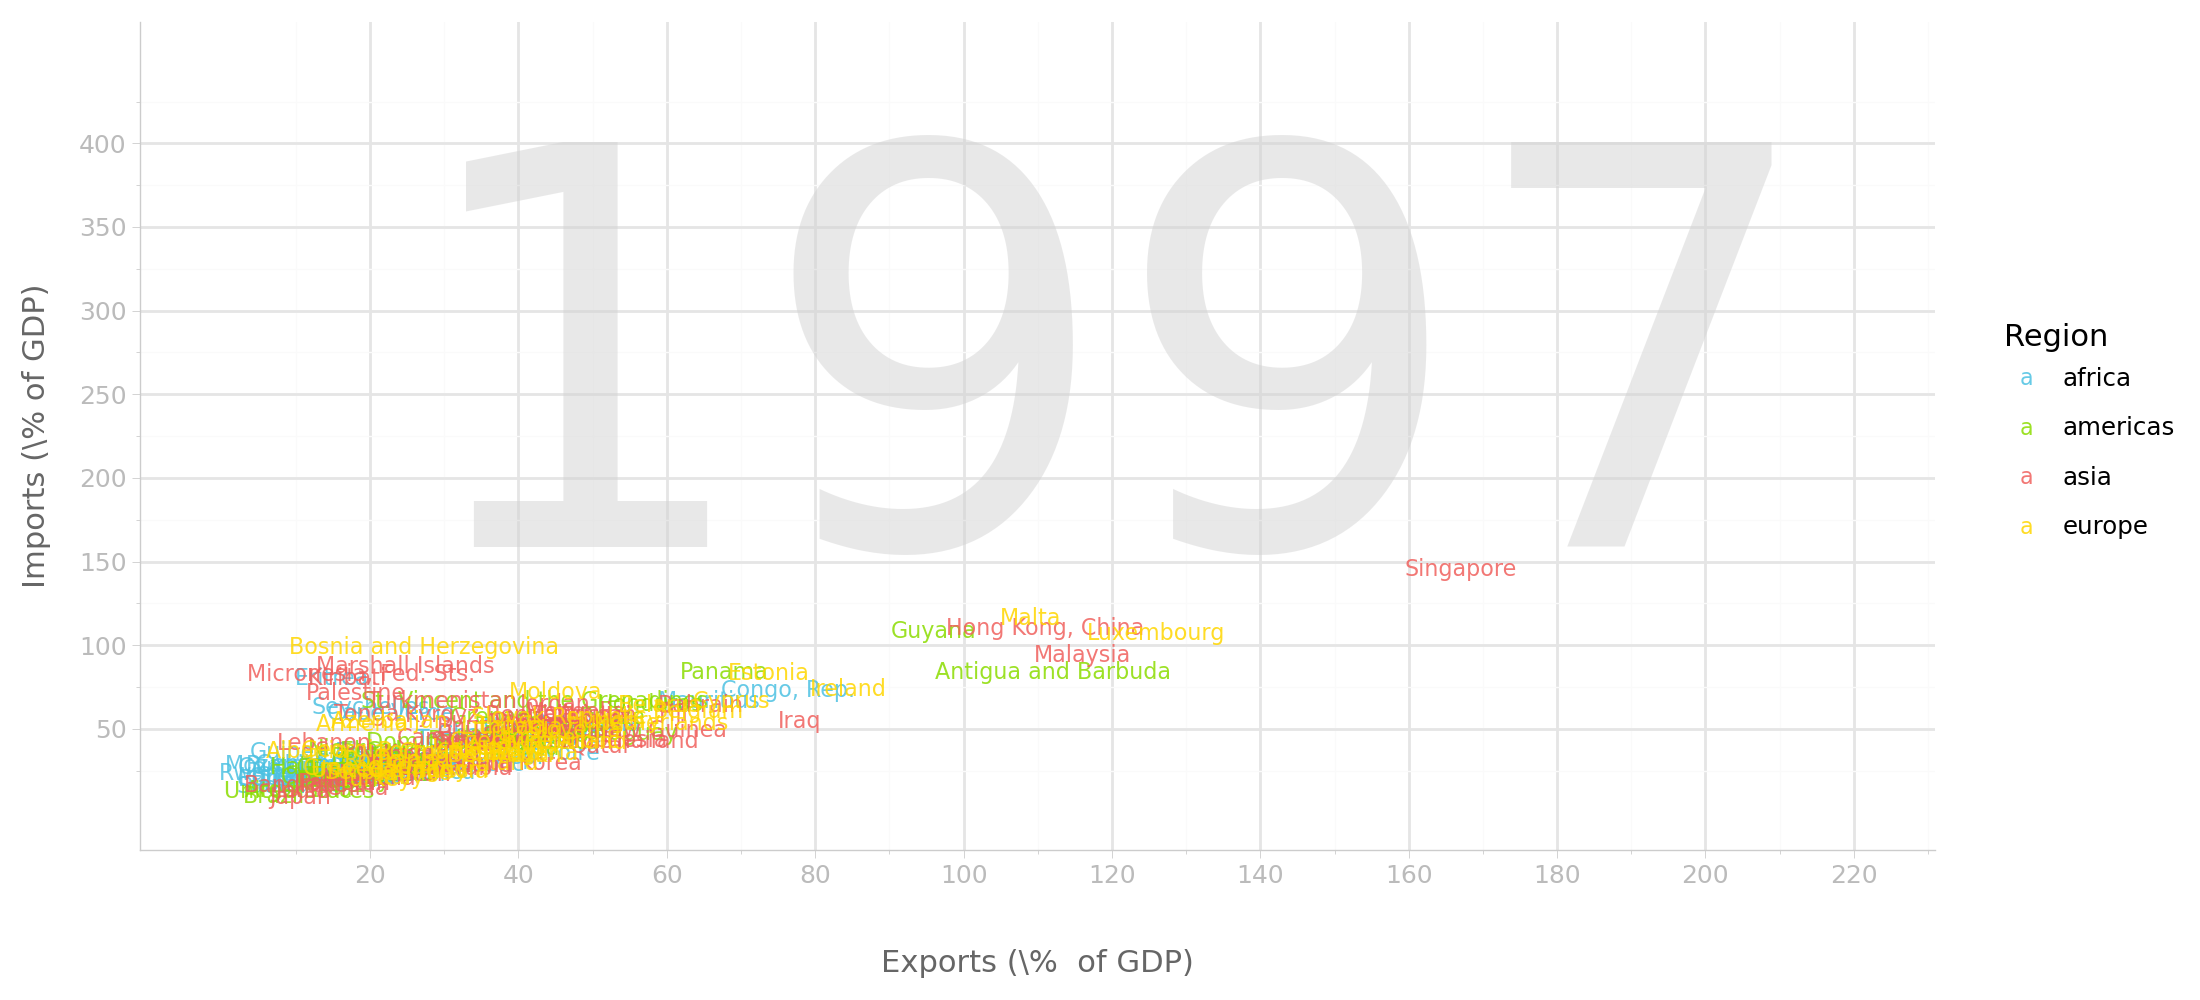

In [771]:
plotBubble2= (
    p9.ggplot(q2Data_clean, p9.aes(x= "exports", y= "imports", size= "energy"))

    # annotate year 1997
    +p9.annotate("text", x=120, y=250, label= "1997", size= 200, color= "lightgrey", alpha= 0.5)

    + p9.geom_text(
        p9.aes(label= "country", color= "four_regions"), 
        size= 8,
        alpha = 0.85
    )

+ p9.scale_x_continuous(
        limits= (0, 220),
        breaks= [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220], 
    )

    + p9.scale_y_continuous(
        limits= (0, 450),
        breaks= [50, 100, 150, 200, 250, 300, 350, 400], 
        expand= (0.05, 0.05)
    )

    + p9.scale_size_area(max_size= 20)
    + p9.guides(size= False)
    + p9.labs(x= "Exports (\%  of GDP)", y= "Imports (\% of GDP)", color= "Region") 

    + p9.theme_minimal() 

    + p9.theme(
        # White background
        plot_background= p9.element_rect(fill= "white", color= "white"),
        panel_background= p9.element_rect(fill= "white", color= "white"),

        # Grid style
        figure_size= (11,5),

        #Axis styling
        axis_text= p9.element_text(color= "#BBBBBB", size= 9),
        axis_title= p9.element_text(color= "#666666", size= 11),
        axis_line= p9.element_line(color= "#CCCCCC", size= 0.5),
        axis_ticks= p9.element_line(color= "#CCCCCC", size= 0.3),

        axis_title_x= p9.element_text(margin= {"t": 10}),
        axis_title_y= p9.element_text(margin= {"r": 10}, angle= 90)

    )
    
    + p9.scale_color_manual(values={
        "asia": "#F0605D",
        "europe": "#FFD600",
        "americas":"#8BDC00",
        "africa": "#4CC1E2"
    })
)

plotBubble2.show()

As seen above, `geom_text` is similar to geom_point in a way that it replaces the bubble points with the country names. This visualization is good, as you can clearly see the names of specific countries that seem to stand out. For example, you can clearly pinpoint Singapore, Malaysia, and Hong Kong, China in this list. While it may be easy to identify countries or intuitively think whether a country is an outlier, the disadvantage is that majority of the countries with overlapping names are not presented clearly. Therefore, it is difficult to understand or identify.

# Task 3

1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.

x-axis: internet users
y-axis: GDP/capita 
fill = four regions
bubble size = income 
bubble = country

The variables are mapped for the color to represent a region; there are a total of four regions represented in this plot.\
Each dot represents a specific country.\
The size of the bubbles represent the income.

The year 2001 is noted in the background, in a lighter shade of grey.

2. Import the q3data.csv dataset.

In [317]:
import pandas as pd

q3Data = pd.read_csv("Data/q3data.csv")
q3Data

,internet_users,gdp,income,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,0.00456,330.0,1190.0,2001,Afghanistan,asia,south_asia,asia_west,South Asia
1,0.39000,2570.0,6780.0,2001,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,1.59000,3770.0,9230.0,2001,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,10500.0,NaN,2001,American Samoa,NaN,NaN,NaN,NaN
4,11.30000,42600.0,35600.0,2001,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
...,...,...,...,...,...,...,...,...,...
210,1.85000,847.0,3270.0,2001,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
211,27.50000,36700.0,NaN,2001,Virgin Islands (U.S.),NaN,NaN,NaN,NaN
212,0.51900,1190.0,4940.0,2001,Yemen,asia,middle_east_north_africa,asia_west,Middle East & North Africa
213,0.47800,991.0,2080.0,2001,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


3. Recreate the plot as best as you can using `plotnine`.

In [747]:
q3Data_clean = q3Data.dropna(subset=["four_regions"])

C:\Users\antar\anaconda3\Lib\site-packages\plotnine\layer.py:372: PlotnineWarning: geom_point : Removed 12 rows containing missing values.


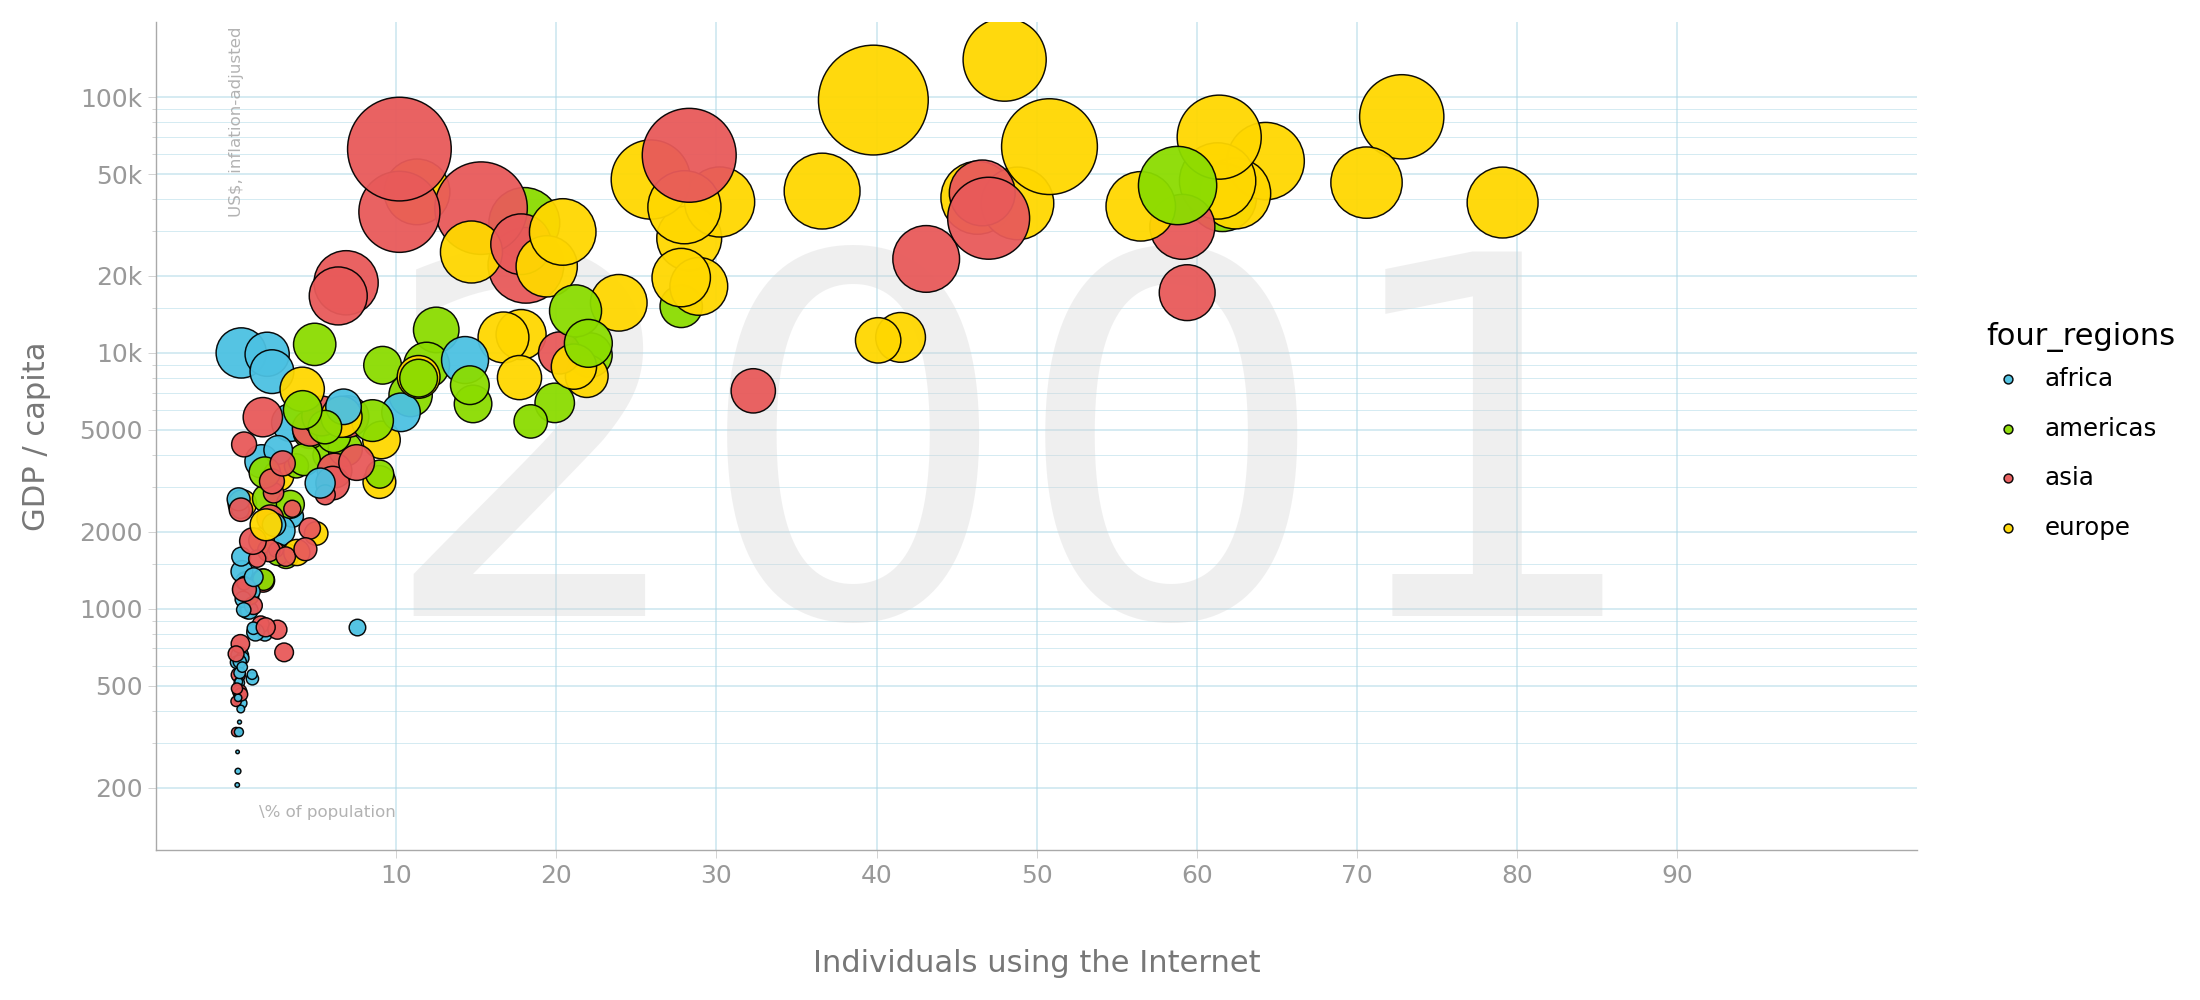

In [770]:
import plotnine as p9

plotBubble3 = (
    p9.ggplot(q3Data_clean, p9.aes(x= "internet_users", y= "gdp", size= "income"))

     #annotate year 2001
    + p9.annotate("text", x=48.5, y=3250, label= "2001", size= 180, color= "lightgrey", alpha= 0.35, ha= "center", va= "center")

    + p9.geom_point(p9.aes(fill= "four_regions"),
        color= "black", 
        stroke= 0.3,
        alpha= 0.95)

    + p9.scale_x_continuous(
        limits= (0, 100), 
        breaks= range(10, 91, 10), #first x label shown in reference is 10
        minor_breaks=[]) #remove squared grids, makes it more rectangular 

    + p9.scale_y_continuous(
        trans= 'log2',
        breaks= [200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000], 
        labels= ["200", "500", "1000", "2000", "5000", "10k", "20k", "50k","100k"],
        minor_breaks= [300, 400, 600, 700, 800, 900, 1500, 3000, 4000, 6000, 7000, 8000, 9000, 15000, 30000, 40000, 60000, 70000, 80000, 90000])

    + p9.labs(
        x= "Individuals using the Internet", y= "GDP / capita")

    + p9.theme_minimal() 

    + p9.theme(
        # White background
        plot_background= p9.element_rect(fill= "white", color= "white"),
        panel_background= p9.element_rect(fill= "white", color= "white"),

        # Grid style
        figure_size= (11,5),
        panel_grid_major= p9.element_line(color= "#ADD8E6", size= 0.7, alpha= 0.5),
        panel_grid_minor= p9.element_line(color= "#ADD8E6", size= 0.3, alpha= 0.6), #Add minor gridlines

        # Panel border - removes top and right borders
        panel_border= p9.element_blank(), 

        #Axis styling
        axis_text= p9.element_text(color= "#999999", size= 9),
        axis_title= p9.element_text(color= "#777777", size= 11),
        axis_line= p9.element_line(color= "darkgrey", size= 0.5),
        axis_ticks= p9.element_line(color= "#CCCCCC", size= 0.3),

        axis_title_x= p9.element_text(margin= {"t": 10}),
        axis_title_y= p9.element_text(margin= {"r": 10}, angle= 90)

    )

    + p9.scale_fill_manual(values={
        "asia": "#E85A5A",
        "europe": "#FFD700",
        "americas": "#8BDC00",
        "africa": "#4CC1E2"})

    + p9.scale_size_area(max_size= 22)
    + p9.guides(size= False)

    #annotate top labels for years and income levels
    + p9.annotate("text", x= 0, y= 80000, label= "US$, inflation-adjusted", size= 6, color= "#AAAAAA", alpha= 0.9, angle= 90)
    + p9.annotate("text", x= 10, y= 160, label= "\% of population", size= 6, color= "#AAAAAA", alpha= 0.9, ha= "right")
)

plotBubble3.show()

4. What other geometries could you use here besides `geom_point`? Provide an actual plot of another geometry being used here and why it's good or bad for visualizing these data.

To illustrate the plot, another geometry we can use is `geom_smooth`.

C:\Users\antar\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\antar\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\antar\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\antar\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\antar\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


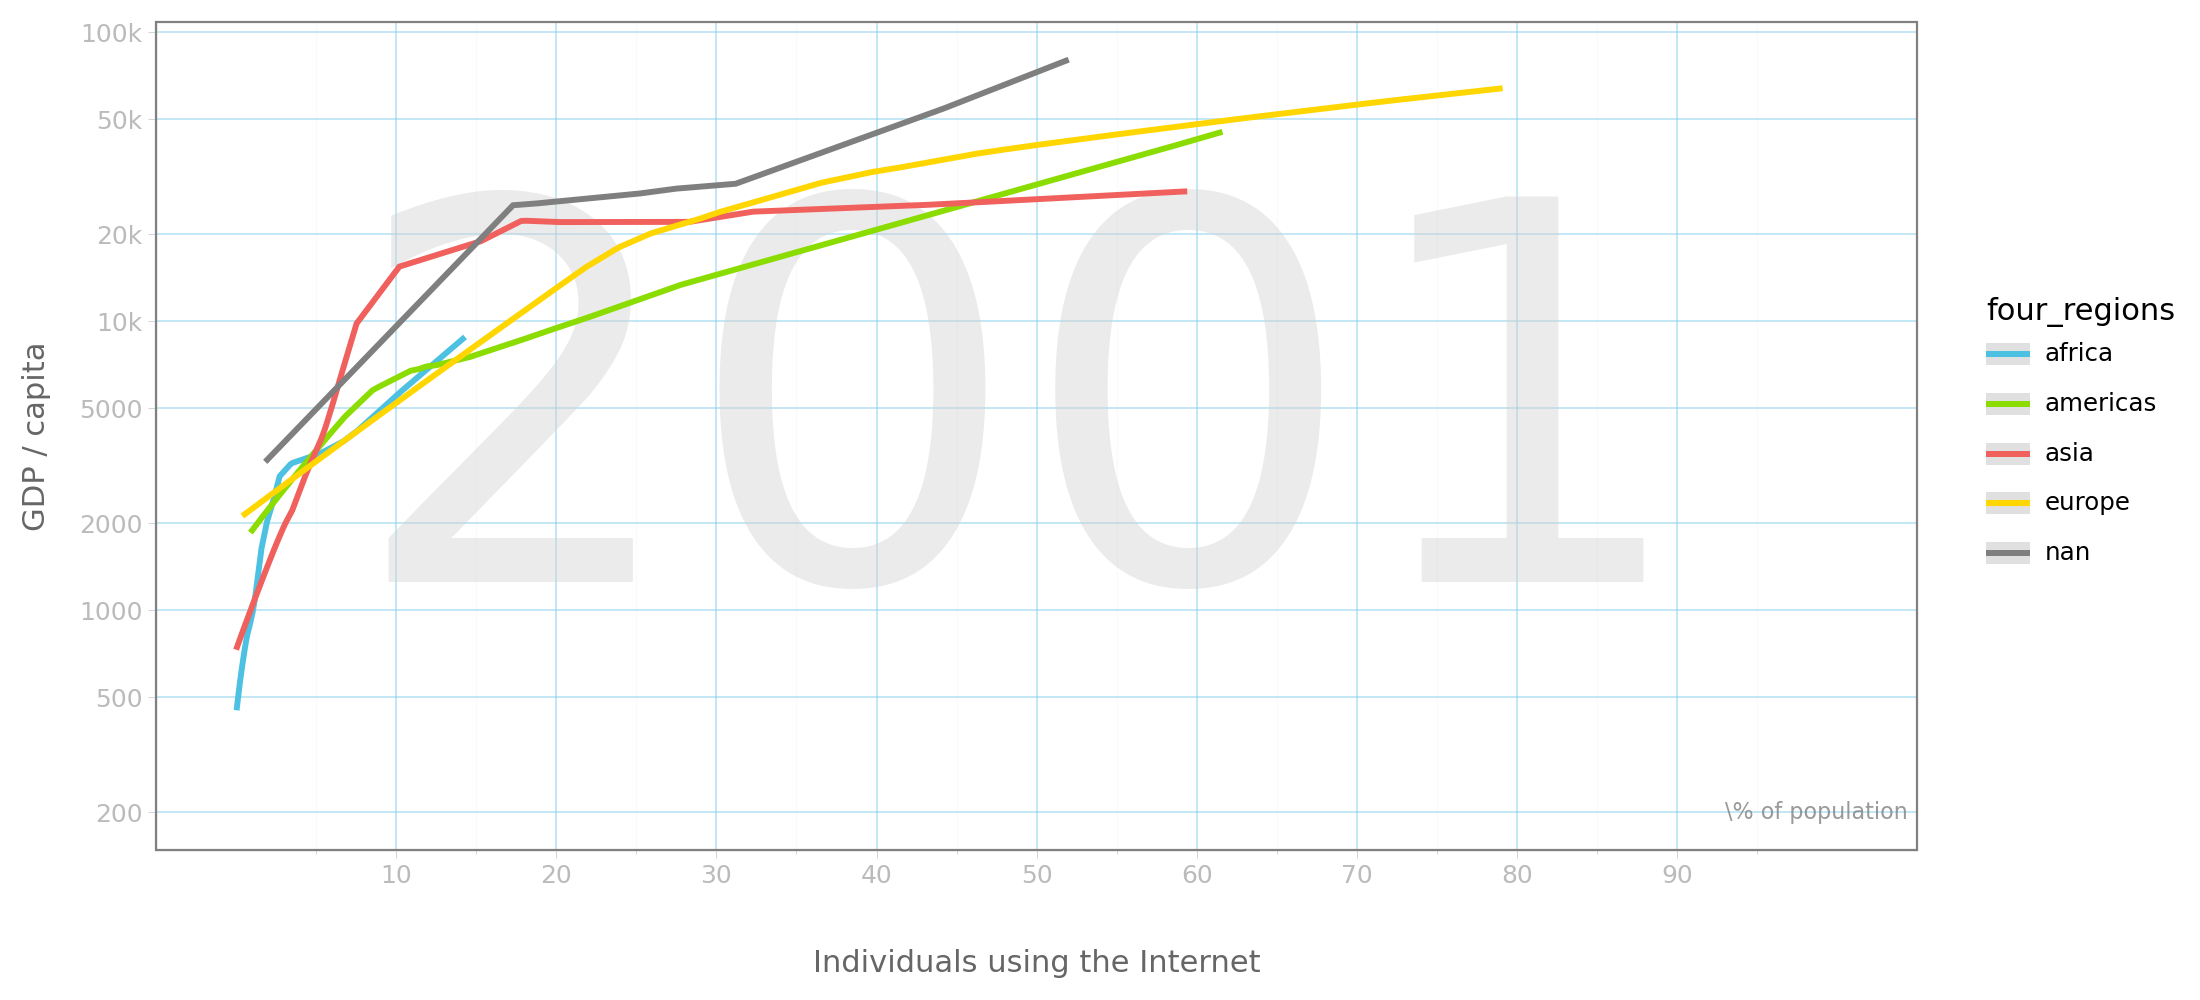

In [ ]:
import plotnine as p9

plotBubble3 = (
    p9.ggplot(q3Data, p9.aes(x= "internet_users", y= "gdp"))

     #annotate year 2001
    + p9.annotate("text", x=49, y=4000, label= "2001", size= 190, color= "lightgrey", alpha= 0.45, ha= "center", va= "center")

    + p9.geom_smooth(
        p9.aes(color= "four_regions"),  
        se= True,  
        alpha= 0.3,  #
        size= 1.2 
    )

    + p9.scale_x_continuous(
        limits= (0, 100),
        breaks= range(10, 91, 10))

    + p9.scale_y_continuous(
        trans= 'log2',
        breaks= [200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000],
        labels= ["200", "500", "1000", "2000", "5000", "10k", "20k", "50k","100k"])

    + p9.labs(
        x= "Individuals using the Internet", y= "GDP / capita")

    + p9.theme_minimal() 

    + p9.theme(
        # White background
        plot_background= p9.element_rect(fill= "white", color= "white"),
        panel_background= p9.element_rect(fill= "white", color= "white"),

        # Grid style
        figure_size= (11,5),
        panel_grid_major= p9.element_line(color= "skyblue", size= 0.7, alpha= 0.5),
        panel_grid_minor= None,

        panel_border= p9.element_rect(color= "grey", fill= None, size= 0.8),

        #Axis styling
        axis_text= p9.element_text(color= "#BBBBBB", size= 9),
        axis_title= p9.element_text(color= "#666666", size= 11),
        axis_line= p9.element_line(color= "#CCCCCC", size= 0.5),
        axis_ticks= p9.element_line(color= "#CCCCCC", size= 0.3),

        axis_title_x= p9.element_text(margin= {"t": 10}),
        axis_title_y= p9.element_text(margin= {"r": 10}, angle= 90)
    )
    
    + p9.scale_color_manual(values={
        "asia": "#F0605D",
        "europe": "#FFD600",
        "americas": "#8BDC00",
        "africa": "#4CC1E2"})
        
    
    + p9.annotate("text", x= 93, y= 200, label= "\% of population", size= 8, color= "grey", alpha= 0.80, ha= "left")
)

plotBubble3.show()

As seen above, a `geom_smooth` shows a linear trend of the data. The clear presentation of the linearity of the trend is the primary advantage of this visualization. However, it does not give a representation of the weight that is represented in a bubble plot. In comparison to a geom_point, there are no bubble plots in geom_smooth to compare the sizes or weight. 

# AI Assistance

I used ChatGPT and Claude AI to debug my code, as well as to answer specific questions (i.e. figuring out how to make the year layer below the bubble points). I wrote, verified, and made all final decisions regarding my code.